* 날짜를 처리하는 data 오브젝트
* 시간을 처리하는 time 오브젝트
* 날짜와 시간 모두를 처리하는 datatime 오브젝트

In [1]:
from datetime import datetime

In [2]:
from datetime import *

In [3]:
now1 = datetime.now()
print(now1)

2020-05-22 09:46:10.236898


In [5]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12,12,13,24,34)
print(t1)
print(t2)
print(t2)

2020-05-22 09:48:42.578488
1970-01-01 00:00:00
1970-01-01 00:00:00


In [8]:
#datetime.timedelta : 두날짜와 시간의 차이를 계산할때 사용됨
#datetime.datetime -datetime.datetime

diff1 = t1 - t2
print(diff1)
print(type(diff1))

18404 days, 9:48:42.578488
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기 

In [9]:
import pandas as pd
import os 
ebola = pd.read_csv('../data/country_timeseries.csv')

In [16]:
ebola.info

<bound method DataFrame.info of            Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
5    12/28/2014  281        2706.0         8018.0             9446.0   
6    12/27/2014  280        2695.0            NaN             9409.0   
7    12/24/2014  277        2630.0         7977.0             9203.0   
8    12/21/2014  273        2597.0            NaN             9004.0   
9    12/20/2014  272        2571.0         7862.0             8939.0   
10   12/18/2014  271           NaN         7830.0                NaN   
11   12/14/2014  267        2416.0            NaN             8356.0   
12    12/9/2014  262           N

In [12]:
test_df1 = pd.DataFrame({'order_day' : ['01/10/15', '02/01/15','03/01/12']})
test_df1['data_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['data_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')
test_df1['data_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')
#날짜 형 변환하여 저장하기 
test_df1

,order_day,data_dt1,data_dt2,data_dt3
0,01/10/15,2015-10-01,2015-01-10,2001-10-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/12,2012-01-03,2012-03-01,2003-01-12


In [14]:
test_df2 = pd.DataFrame({'order_day' : ['01-10-15', '02-01-15','03-01-12']})
test_df2['data_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')
test_df2

,order_day,data_dt
0,01-10-15,2015-10-01
1,02-01-15,2015-01-02
2,03-01-12,2012-01-03


# 시계열 데이터를 구분해서 추출


In [17]:
#strftime 메소드와 시간 형식 지정자를 이용해 시계열 데이터를 자름
now = datetime.now()
print(now)

2020-05-22 10:10:11.780907


In [19]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2020-05-22


In [21]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
#날짜 형식 잘 볼것.
nowDatetime

'2020-05-22 10:10:11'

# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [26]:
ebola1 = pd.read_csv('../data/country_timeseries.csv', parse_dates = ['Date'])
#데이터타임 오브젝트로 변환해서 가져올때, parse_dates = [컬럼명]으로 옵션을 지정한다.
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


# datetime 오브젝트에서 날짜 정보 추출하기

In [27]:
date_series = pd.Series(['2018-05-16', '2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [29]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


# dt 접근자로 시계열 데이터 정리하기


In [34]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
#문자열의 Date  data타입을 date 형으로 변환할때, .to_datetime(데이터프레임[컬럼명])으로 사용할 수 있다. 

In [38]:
ebola[['Date', 'date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [40]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


In [44]:
# dt 접근자를 이용하면 datetime 속성이나 메서드를 사용, 시계열 데이터를 처리
ebola['year'] = ebola['date_dt'].dt.year
ebola['month'] = ebola['date_dt'].dt.month
ebola['day'] = ebola['date_dt'].dt.day
ebola[['Date', 'date_dt', 'year', 'month', 'day']].head()
#따로 행수를 맞출필요 없이, 데이터 프레임 의 date 타입의 date_dt를 년,월,일 별로 짜르기 위해서 dt메서드를 사용해준다.

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


In [47]:
ebola.info()
#dt 메서드로, date_dt의 데이트 타입을 추출하면 int 형으로 추출된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                  122 no

# 에볼라 최초 발병일 계산하기

In [50]:
ebola.iloc[-5:, :5]
#밑에서 부터 5행까지, 0~5열까지 출력
#최초 발병일 : 3/22/2014

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


In [52]:
ebola['date_dt'].min()
#date 타입의 컬럼에서도 min() -> 가장 작은(?) 가장 최초의 값을 출력할 수 있다. 

Timestamp('2014-03-22 00:00:00')

In [56]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
#발생일로 부터 최초 발생일을 빼면 최초발생일로부터 의 일수가 나온다 -> 에볼라 진행정도
ebola[['date_dt', 'outbreak_d']].head()

,date_dt,outbreak_d
0,2015-01-05,289 days
1,2015-01-04,288 days
2,2015-01-03,287 days
3,2015-01-02,286 days
4,2014-12-31,284 days


# 파산한 은행의 개수 계산하기

In [66]:
banks = pd.read_csv('../data/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [70]:
banks = pd.read_csv('../data/banklist.csv', parse_dates = [5,6])
banks.info()
#date 에 관련된 칼럼들의 데이터 타입을 datetime64 로 변환, Dec, Oct 같이 month 가 영어로 표기되도, 숫자로 변환되어 나타내진다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [71]:
banks['closing_quater'],banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
#쿼터는 데이트 타입을 분기별로 뽑아내준다.
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quater,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


In [72]:
closing_year = banks.groupby(['closing_year']).size()
#closing_year 별로 그룹화 하여, size()-> 갯수를 리턴해준다.
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [109]:
closing_year_q = banks.groupby(['closing_year', 'closing_quater']).size()
closing_year_q_df = pd.DataFrame(closing_year_q).reset_index()
closing_year_q_df.rename(columns ={0:'count'}, inplace = True)
closing_year_q_df.head()

,closing_year,closing_quater,count
0,2000,4,2
1,2001,1,1
2,2001,2,1
3,2001,3,2
4,2002,1,6


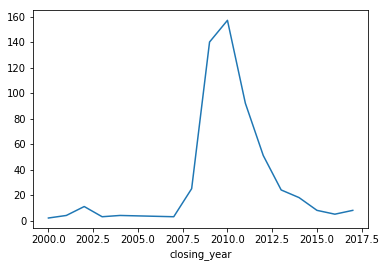

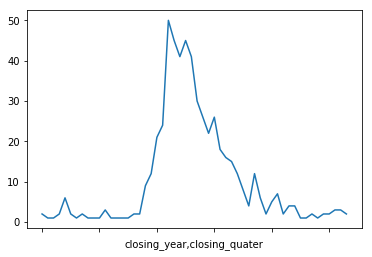

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots()
ax = closing_year.plot()
plt.show()


f, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

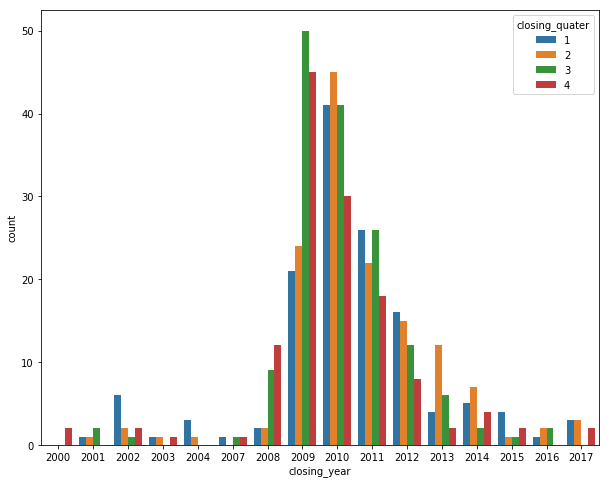

In [111]:
ax = plt.subplots(figsize = (10,8))

ax = sns.barplot( x= 'closing_year', y = 'count', hue = 'closing_quater', data = closing_year_q_df)

# 테슬라 주식 데이터로 시간 계산하기

In [112]:
tesla = pd.read_csv('../data/tesla_stock_quandl.csv', parse_dates = [0])
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [115]:
tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)]
#2010 년 6월 데이터를 출력해주세요 

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


## datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

In [119]:
tesla.index = tesla['Date']
#Date컬럼을 인덱스로 사용하겠다
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [120]:
tesla['2015'].iloc[:5,:5]
#인덱스 중, 2015로 시작하는 데이터들의 5행 5열 출력

,Date,Open,High,Low,Close
Date,,,,,
2015-12-31,2015-12-31,238.51,243.450,238.3700,240.01
2015-12-30,2015-12-30,236.60,243.634,235.6707,238.09
2015-12-29,2015-12-29,230.06,237.720,229.5470,237.19
2015-12-28,2015-12-28,231.49,231.980,225.5400,228.95
2015-12-24,2015-12-24,230.56,231.880,228.2800,230.57


In [123]:
tesla['2016-06'].iloc[:5, :5]
#인덱스가 date 타입이기 때문에, 양식에 맞춰서 입력해주면 된다. 2016-06월의 5행 5열 데이터를 출력해라

,Date,Open,High,Low,Close
Date,,,,,
2016-06-30,2016-06-30,212.97,213.4999,209.02,212.28
2016-06-29,2016-06-29,205.13,211.7800,203.00,210.19
2016-06-28,2016-06-28,201.89,204.0500,199.41,201.79
2016-06-27,2016-06-27,190.86,198.8100,187.87,198.55
2016-06-24,2016-06-24,190.05,195.1200,189.73,193.15


## 시간 간격을 인덱스로 설정하여 데이터 추출하기

In [125]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()
#date열의 최솟값을 뺴서, 경과일을 칼럼으로 추가하기 

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,2828 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,2827 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,2824 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,2823 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,2822 days


In [127]:
tesla.index = tesla['ref_date']
tesla.iloc[:5, :5]

,Date,Open,High,Low,Close
ref_date,,,,,
2828 days,2018-03-27,304.00,304.27,277.18,279.18
2827 days,2018-03-26,307.34,307.59,291.36,304.18
2824 days,2018-03-23,311.25,311.61,300.45,301.54
2823 days,2018-03-22,313.89,318.82,308.18,309.10
2822 days,2018-03-21,310.25,322.44,310.19,316.53


In [134]:
tesla['5 days':].iloc[:5,:5]
#최소days 부터, '5days'까지 5행 5열로 데이터 출력
#인덱스 추출에 조건을 줬기 때문에 잘파악해야 한다.

,Date,Open,High,Low,Close
ref_date,,,,,
3 days,2010-07-02,23.00,23.1000,18.71,19.20
2 days,2010-07-01,25.00,25.9200,20.27,21.96
1 days,2010-06-30,25.79,30.4192,23.30,23.83
0 days,2010-06-29,19.00,25.0000,17.54,23.89


# 시간 범위 생성해 인덱스로 지정하기

In [136]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [140]:
head_range = pd.date_range(start ='2014-12-31', end = '2015-01-05')
head_range

#pd.date_range 를 통해, 특정 날짜 범위를 생성할 수 있다. 
# 시작일 과 기간을 입력 하면 범위내의 인덱스를 생성해주기도 한다. 

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

* pd.to_datetime 함수는 스트링 형태를 자동으로 datetime자료형으로 바꾼후, datetimeindex 자료형 인덱스를 생성한다.
* pd.date_range 함수는 시작일과 종료일, 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해준다. 

In [141]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
#ebola_5의 인덱스를 head_range에 속한 datetime index로 reindex 한다.
ebola_5.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


# 시간범위의 주기 설정하기 

In [142]:
pd.date_range('2017-01-01', '2017-01-07', freq= 'B')
#지정한 기간중 freq = 'B'-> 평일만 포함하겠다.

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

### 그래프 그려보기

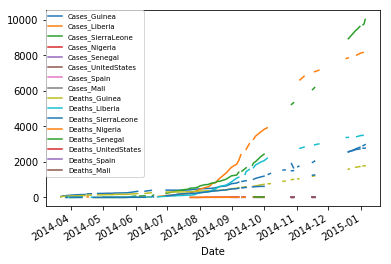

In [149]:
import matplotlib.pyplot as plt
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ebola
ax = ebola.iloc[0:, 2:].plot(ax = ax)
ax.legend(fontsize = 7, loc = 2, borderaxespad = 0.)
plt.show()

## 데이터프레임 준비하기

In [166]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])

In [167]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
#에볼라의 인덱스min~max까지의 데이트를 인덱스로 가져온다
new_idx = reversed(new_idx)
#가져온 인덱스를 역순으로 재배치.

In [168]:
ebola = ebola.reindex(new_idx)
#에볼라의 인덱스를 역순으로 배치한 데이터 순으로 reindexing 해준다. 
ebola.head().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN
